In [178]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
!wget 'https://github.com/TheDataNomad/AlgoWarzmi/raw/refs/heads/main/datasets/rd7ab_template.xlsx'

--2025-02-11 10:43:19--  https://github.com/TheDataNomad/AlgoWarzmi/raw/refs/heads/main/datasets/rd7ab_template.xlsx
Resolving github.com (github.com)... 20.233.83.145
Connecting to github.com (github.com)|20.233.83.145|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TheDataNomad/AlgoWarzmi/refs/heads/main/datasets/rd7ab_template.xlsx [following]
--2025-02-11 10:43:19--  https://raw.githubusercontent.com/TheDataNomad/AlgoWarzmi/refs/heads/main/datasets/rd7ab_template.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21212 (21K) [application/octet-stream]
Saving to: ‘rd7ab_template.xlsx’

rd7ab_template.xlsx 100%[===================>]  20.71K  --.-KB/s    in 0.07s   

2025-02-11 10:43:21 (309

In [179]:
df = pd.read_excel("rd7ab_template.xlsx")

In [180]:
df = df[10:]
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
10,1,MOHERE,Account 1,Ibra,999277,421.614,209.674,631.288,728.868,52.739,781.607,1150.482,262.413,1412.895
11,2,"Ministry of Commerce, Industry & Investment Pr...",Account 2,Salalah,574447,258.928,106.411,365.339,438.586,57.955,496.541,697.514,164.366,861.88
12,3,Ministry of Housing and Urban Planning,Account 3,THE GREAT CITY OF IBRA,591080,931.157,233.286,1164.443,178.683,69.703,248.386,1109.84,302.989,1412.829
13,4,Oman Vision 2040 Implementation Follow-up Unit,Account 4,Sohar,828941,34.731,447.062,481.793,504.926,367.325,872.251,539.657,814.387,1354.044
14,5,Oman Investment Authority,Account 5,Muscat Gov,777715,258.06,209.675,467.735,390.65,237.798,628.448,648.71,447.473,1096.183


In [181]:
df.columns = ["ID","Ministries/Department/Councils","Account Name","Location of Branch","Account Number",
              "Demand Deposits - OMR","Demand Deposits - FCY","Demand Deposits - Total",
              'Fixed Deposits - OMR','Fixed Deposits - FCY','Fixed Deposits - Total',
              'Total Deposits - OMR','Total Deposits - FCY','Total Deposits - Total']		

In [182]:
df.drop('ID',axis=1,inplace=True)

In [183]:
df.head(2)

,Ministries/Department/Councils,Account Name,Location of Branch,Account Number,Demand Deposits - OMR,Demand Deposits - FCY,Demand Deposits - Total,Fixed Deposits - OMR,Fixed Deposits - FCY,Fixed Deposits - Total,Total Deposits - OMR,Total Deposits - FCY,Total Deposits - Total
10,MOHERE,Account 1,Ibra,999277,421.614,209.674,631.288,728.868,52.739,781.607,1150.482,262.413,1412.895
11,"Ministry of Commerce, Industry & Investment Pr...",Account 2,Salalah,574447,258.928,106.411,365.339,438.586,57.955,496.541,697.514,164.366,861.88


In [184]:
df.dropna(how='all',axis=0,inplace=True)

In [185]:
df.tail(2)

,Ministries/Department/Councils,Account Name,Location of Branch,Account Number,Demand Deposits - OMR,Demand Deposits - FCY,Demand Deposits - Total,Fixed Deposits - OMR,Fixed Deposits - FCY,Fixed Deposits - Total,Total Deposits - OMR,Total Deposits - FCY,Total Deposits - Total
108,MOH,Account 99,Sohar,680352,223.362,436.821,660.183,512.778,90.246,603.024,736.14,527.067,1263.207
109,Ministry of Interior,Account 100,Muscat,583454,151.111,402.481,553.592,279.164,55.565,334.729,430.275,458.046,888.321


In [186]:
final_df = pd.DataFrame()
final_df

""


In [187]:
empty_string = ""
empty_number = 0
empty_list = []
empty_dict = {}

rd7df = pd.DataFrame()

for column in ["Demand Deposits - OMR","Demand Deposits - FCY","Demand Deposits - Total",
              'Fixed Deposits - OMR','Fixed Deposits - FCY','Fixed Deposits - Total',
              'Total Deposits - OMR','Total Deposits - FCY','Total Deposits - Total']:
    deposit_name = column.split(" ")[0]
    currency_name = column.split(" ")[3]

    temp_df = df[["Ministries/Department/Councils","Account Name","Location of Branch","Account Number"]]
    temp_df['Deposit Type'] = deposit_name
    temp_df['Currency'] = currency_name
    temp_df['value'] = df[column]

    rd7df = pd.concat([rd7df,temp_df],axis=0)

rd7df.head()
    

,Ministries/Department/Councils,Account Name,Location of Branch,Account Number,Deposit Type,Currency,value
10,MOHERE,Account 1,Ibra,999277,Demand,OMR,421.614
11,"Ministry of Commerce, Industry & Investment Pr...",Account 2,Salalah,574447,Demand,OMR,258.928
12,Ministry of Housing and Urban Planning,Account 3,THE GREAT CITY OF IBRA,591080,Demand,OMR,931.157
13,Oman Vision 2040 Implementation Follow-up Unit,Account 4,Sohar,828941,Demand,OMR,34.731
14,Oman Investment Authority,Account 5,Muscat Gov,777715,Demand,OMR,258.06


In [162]:
rd7df.tail()

,Ministries/Department/Councils,Account Name,Location of Branch,Account Number,Deposit Type,Currency,value
105,MOE,Account 96,nizwa,344265,Total,Total,1202.585
106,"Ministry of Transport, Communications & IT",Account 97,Muscat Gov,620829,Total,Total,1676.531
107,Oman Vision 2040 Implementation Follow-up Unit,Account 98,Muscat,932371,Total,Total,1274.348
108,MOH,Account 99,Sohar,680352,Total,Total,1263.207
109,Ministry of Interior,Account 100,Muscat,583454,Total,Total,888.321


In [51]:
###### START HERE 
import pandas as pd
!wget 'https://github.com/TheDataNomad/AlgoWarzmi/raw/refs/heads/main/datasets/ConsumerPriceIndex.xlsx'

--2025-02-11 12:03:41--  https://github.com/TheDataNomad/AlgoWarzmi/raw/refs/heads/main/datasets/ConsumerPriceIndex.xlsx
Resolving github.com (github.com)... 20.233.83.145
Connecting to github.com (github.com)|20.233.83.145|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TheDataNomad/AlgoWarzmi/refs/heads/main/datasets/ConsumerPriceIndex.xlsx [following]
--2025-02-11 12:03:41--  https://raw.githubusercontent.com/TheDataNomad/AlgoWarzmi/refs/heads/main/datasets/ConsumerPriceIndex.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83865 (82K) [application/octet-stream]
Saving to: ‘ConsumerPriceIndex.xlsx’

ConsumerPriceIndex. 100%[===================>]  81.90K   535KB/s    in 0.2s    

2025-02-

In [188]:
df = pd.read_excel("ConsumerPriceIndex.xlsx")

In [189]:
df = df[9:]

In [190]:
df = df.dropna(how='all',axis=1)

In [191]:
column_names = list(df.loc[9])
df.columns = column_names

df = df[1:]
df.head(2)

,Country code,Descriptor,INDICATOR,BASE_PER,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
10,PCPI_IX,"Consumer Price Index, All items",PCPI_IX,2018,95.089707,95.089707,94.90085,94.711992,94.995279,95.184136,...,105.6,105.8,105.6,105.6,105.3,105.4,105.5,105.8,105.9,106.3
11,PCPI_CP_01_IX,Food and non-alcoholic beverages,PCPI_CP_01_IX,2018,99.41349,99.315738,98.826979,97.947214,98.533724,99.41349,...,111.7,112.1,112.5,113.4,111.9,112.1,112.1,113.6,115,116.8


In [192]:
repeated_cols = list(df.columns[:4])

In [193]:
final_df = pd.DataFrame()
for date_column in list(df.columns[4:]):
    # print(date_column)
    temp_df = df[repeated_cols]
    temp_df['Date'] = date_column
    temp_df['values'] = df[date_column]

    final_df = pd.concat([final_df,temp_df],axis=0)

final_df

,Country code,Descriptor,INDICATOR,BASE_PER,Date,values
10,PCPI_IX,"Consumer Price Index, All items",PCPI_IX,2018,2013-01,95.089707
11,PCPI_CP_01_IX,Food and non-alcoholic beverages,PCPI_CP_01_IX,2018,2013-01,99.41349
12,PCPI_CP_02_IX,"Alcoholic Beverages, Tobacco, and Narcotics",PCPI_CP_02_IX,2018,2013-01,76.666667
13,PCPI_CP_03_IX,Clothing and footwear,PCPI_CP_03_IX,2018,2013-01,101.402806
14,PCPI_CP_04_IX,"Housing, Water, Electricity, Gas and Other Fuels",PCPI_CP_04_IX,2018,2013-01,95.328885
...,...,...,...,...,...,...
31,PCPI_CP_08_WT,"Communication, Weight",PCPI_CP_08_WT,2018,2024-07,5.874
32,PCPI_CP_09_WT,"Recreation and culture, Weight",PCPI_CP_09_WT,2018,2024-07,1.142
33,PCPI_CP_10_WT,"Education, Weight",PCPI_CP_10_WT,2018,2024-07,2.388
34,PCPI_CP_11_WT,"Restaurants and hotels, Weight",PCPI_CP_11_WT,2018,2024-07,4.493


In [194]:
##### 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3614 entries, 10 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country code  3614 non-null   object
 1   Descriptor    3614 non-null   object
 2   INDICATOR     3614 non-null   object
 3   BASE_PER      3614 non-null   object
 4   Date          3614 non-null   object
 5   values        3614 non-null   object
dtypes: object(6)
memory usage: 197.6+ KB


In [195]:
final_df.describe()

,Country code,Descriptor,INDICATOR,BASE_PER,Date,values
count,3614,3614,3614,3614,3614,3614
unique,26,26,26,1,139,495
top,PCPI_IX,"Consumer Price Index, All items",PCPI_IX,2018,2013-01,100
freq,139,139,139,3614,26,192


In [196]:
##### Cleaning the date column
from datetime import date 
# date(2025,2,11)


new_date_values = []
for date_input in list(final_df['Date']):
    year = int(date_input.split("-")[0])
    month = int(date_input.split("-")[1])

    new_date_values.append(date(year,month,1))

final_df['Date'] = new_date_values



# final_df['Date'] = [date(int(date_input.split("-")[0]),int(date_input.split("-")[1]),1) for date_input in list(final_df['Date'])]

In [197]:
final_df.query("INDICATOR == 'PCPI_CP_02_IX'")
filtered_df = final_df[final_df['INDICATOR'] == 'PCPI_CP_02_IX']

In [198]:
to_keep = [x for x in list(set(final_df['INDICATOR'])) if x.endswith("IX")]

filtered_df_IX = final_df[final_df['INDICATOR'].isin(to_keep)]

<Axes: xlabel='Date', ylabel='values'>

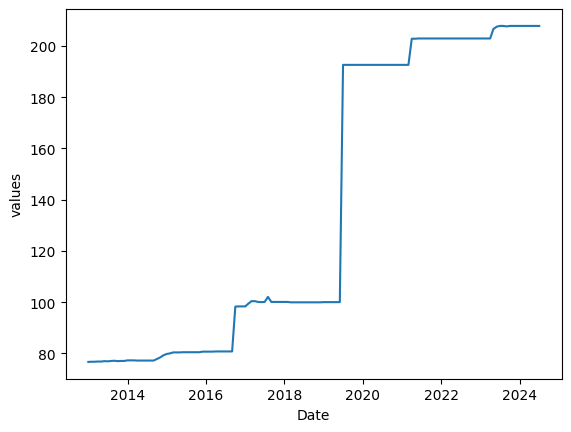

In [199]:
import seaborn as sns


sns.lineplot(data=filtered_df,x='Date',y='values')

<Axes: xlabel='Date', ylabel='values'>

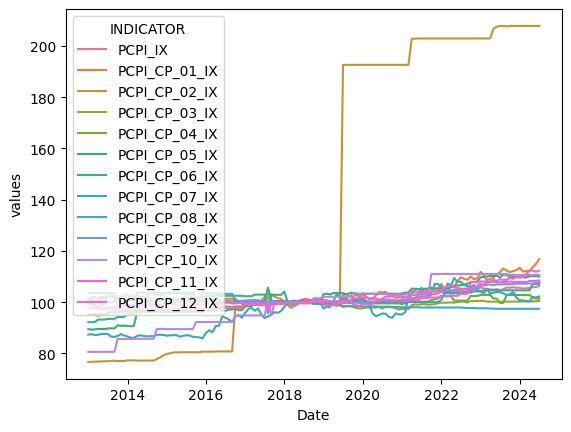

In [200]:
sns.lineplot(data=filtered_df_IX,x='Date',y='values',hue='INDICATOR')

In [176]:
import plotly.express as px

fig = px.line(filtered_df_IX, x="Date", y="values",color='INDICATOR')
fig.update_xaxes(rangeslider_visible=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [201]:
rd7df

,Ministries/Department/Councils,Account Name,Location of Branch,Account Number,Deposit Type,Currency,value
10,MOHERE,Account 1,Ibra,999277,Demand,OMR,421.614
11,"Ministry of Commerce, Industry & Investment Pr...",Account 2,Salalah,574447,Demand,OMR,258.928
12,Ministry of Housing and Urban Planning,Account 3,THE GREAT CITY OF IBRA,591080,Demand,OMR,931.157
13,Oman Vision 2040 Implementation Follow-up Unit,Account 4,Sohar,828941,Demand,OMR,34.731
14,Oman Investment Authority,Account 5,Muscat Gov,777715,Demand,OMR,258.06
...,...,...,...,...,...,...,...
105,MOE,Account 96,nizwa,344265,Total,Total,1202.585
106,"Ministry of Transport, Communications & IT",Account 97,Muscat Gov,620829,Total,Total,1676.531
107,Oman Vision 2040 Implementation Follow-up Unit,Account 98,Muscat,932371,Total,Total,1274.348
108,MOH,Account 99,Sohar,680352,Total,Total,1263.207


In [205]:
unclean_list = list(set(rd7df['Ministries/Department/Councils']))

dict(zip(unclean_list,unclean_list))

{'MOHE': 'MOHE',
 'MTICTPublic Authority for Social Insurance': 'MTICTPublic Authority for Social Insurance',
 'Royal Police': 'Royal Police',
 'Supreme Council for Planning': 'Supreme Council for Planning',
 'MOHERE': 'MOHERE',
 'Ministry of Energy and Minerals': 'Ministry of Energy and Minerals',
 'MOH': 'MOH',
 'ROYAL OMAN POLICEMinistry of Education': 'ROYAL OMAN POLICEMinistry of Education',
 'Oman Vision 2040 Implementation Follow-up Unit': 'Oman Vision 2040 Implementation Follow-up Unit',
 'Royal Oman Police': 'Royal Oman Police',
 'Ministry of Commerce, Industry & Investment Promotion': 'Ministry of Commerce, Industry & Investment Promotion',
 'rop': 'rop',
 'Oman Investment Authority': 'Oman Investment Authority',
 'Ministry of Interior': 'Ministry of Interior',
 'Ministry of Housing and Urban Planning': 'Ministry of Housing and Urban Planning',
 'Ministry of Heritage and Tourism': 'Ministry of Heritage and Tourism',
 'ROP': 'ROP',
 'Ministry of Transport, Communications & IT'